<a href="https://colab.research.google.com/github/TruongThanhNhan20146382/Sign_luaguage/blob/main/Sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
trainset='/content/drive/MyDrive/AI_project/data'

In [ ]:
train_dataset_fl=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 3491 images belonging to 8 classes.
Found 384 images belonging to 8 classes.


In [ ]:
{
 'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'H': 4,
 'I': 5,
 'R': 6,
 'W': 7
 }

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'H': 4, 'I': 5, 'R': 6, 'W': 7}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset_fl,batch_size=128,epochs=30,verbose=1,validation_data=validation_set)

Epoch 1/30
28/28 [==============================] - 591s 20s/step - loss: 2.0353 - accuracy: 0.2019 - val_loss: 1.7957 - val_accuracy: 0.3047
Epoch 2/30
28/28 [==============================] - 25s 888ms/step - loss: 1.6586 - accuracy: 0.3858 - val_loss: 1.6122 - val_accuracy: 0.4141
Epoch 3/30
28/28 [==============================] - 24s 839ms/step - loss: 1.2190 - accuracy: 0.5560 - val_loss: 1.2365 - val_accuracy: 0.5807
Epoch 4/30
28/28 [==============================] - 24s 863ms/step - loss: 0.7732 - accuracy: 0.7445 - val_loss: 0.7406 - val_accuracy: 0.7786
Epoch 5/30
28/28 [==============================] - 25s 886ms/step - loss: 0.5801 - accuracy: 0.8026 - val_loss: 0.6214 - val_accuracy: 0.7865
Epoch 6/30
28/28 [==============================] - 25s 884ms/step - loss: 0.3727 - accuracy: 0.8771 - val_loss: 0.2753 - val_accuracy: 0.9245
Epoch 7/30
28/28 [==============================] - 25s 894ms/step - loss: 0.2526 - accuracy: 0.9118 - val_loss: 0.4989 - val_accuracy: 0.8698


In [ ]:
model.save('/content/drive/MyDrive/AI_project/signlanguage.h5')

In [ ]:
# Load the pre-trained model

model =load_model('/content/drive/MyDrive/AI_project/signlanguage.h5')

In [ ]:
label = ['A', 'B', 'C', 'D', 'H','I','R','W']

1/1 [==============================] - 8s 8s/step
A


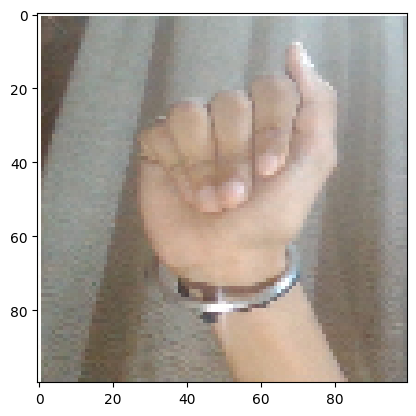

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/AI_project/data/A /10.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 24ms/step
D


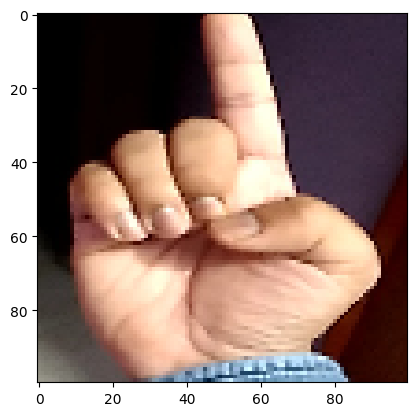

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/AI_project/data/D/D (102).jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

In [ ]:

devices = [cv2.VideoCapture(i) for i in range(10)]
device_names = [f"Device {i}: {dev.read()[0]}" for i, dev in enumerate(devices)]
print('\n'.join(device_names))

Device 0: False
Device 1: False
Device 2: False
Device 3: False
Device 4: False
Device 5: False
Device 6: False
Device 7: False
Device 8: False
Device 9: False


In [ ]:
# Set up the webcam
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True:
    ret, frame = cap.read()

    # Preprocess the input
    frame = cv2.resize(frame, (224, 224))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = frame.astype('float32') / 255.0
    frame = tf.expand_dims(frame, axis=0)

    # Run the prediction
    prediction = model.predict(frame)
    predicted_class = tf.argmax(prediction, axis=1)[0].numpy()

    # Display the result
    cv2.putText(frame, f"Predicted Class: {predicted_class}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Sign Language Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

error: ignored